In [12]:
#데이터 출처 - http://www.turbomap.ch/Home/CompressorMap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

data = pd.read_csv('Comp_Data.csv', sep = ',', header = None)

In [13]:
data = data[6:59]           # 인덱스 정보 제외
Pressure_r = data.loc[:, 2]   # 압력 : PRC (T-S)
Flow_r = data.loc[:, 1]     # 유량 : Massc-kg/s
Effi = data.loc[:,3]        # 효율 : Efficiency (T-S)

In [14]:
# 데이터 타입 / 단위 / 자리 수 정리

Pressure_r = np.round(np.array(Pressure_r, dtype=np.float), 2)
Flow_r = np.round(np.array(Flow_r, dtype=np.float), 2)
Effi = np.round(np.array(Effi, dtype=np.float), 2)

In [15]:
'''
# Surge 라인
Flow_surge_array = np.zeros(6)
Pressure_surge_array = np.zeros(6)

# Comp Map에서 스피드 라인 별 몇 개의 점이 기록되는지 확인(실험 데이터에서)
# 포인트가 순서대로 기록되지 않는 경우 i 수정 필요

# Choke, Surge 라인이 필요한 경우 작성
for i in range(6):
    Flow_surge_array[i] = Flow_r[7*(i+1)]
    Pressure_surge_array[i] = Pressure_r[7*(i+1)]
    
    Flow_choke_array[i] = Flow_r[7*i+1]
    Pressure_choke_array[i] = Pressure_r[7*i+1]
'''

'\n# Surge 라인\nFlow_surge_array = np.zeros(6)\nPressure_surge_array = np.zeros(6)\n\n# Comp Map에서 스피드 라인 별 몇 개의 점이 기록되는지 확인(실험 데이터에서)\n# 포인트가 순서대로 기록되지 않는 경우 i 수정 필요\n\n# Choke, Surge 라인이 필요한 경우 작성\nfor i in range(6):\n    Flow_surge_array[i] = Flow_r[7*(i+1)]\n    Pressure_surge_array[i] = Pressure_r[7*(i+1)]\n    \n    Flow_choke_array[i] = Flow_r[7*i+1]\n    Pressure_choke_array[i] = Pressure_r[7*i+1]\n'

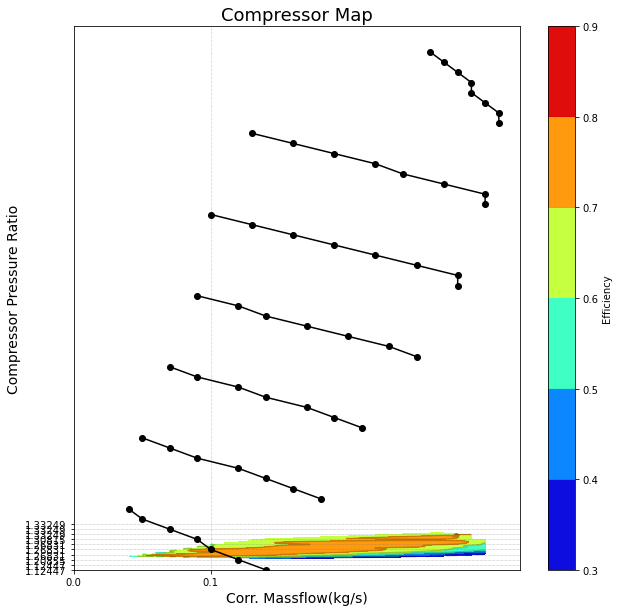

In [16]:
# Line Plot

fig, ax = plt.subplots(figsize = (10, 10))

im = ax.plot(Flow_r[0:7], Pressure[0:7], 'k-o',
             Flow_r[7:14], Pressure[7:14], 'k-o',
             Flow_r[14:21], Pressure[14:21], 'k-o',
             Flow_r[21:28], Pressure[21:28], 'k-o',
             Flow_r[28:36], Pressure[28:36], 'k-o',
             Flow_r[36:44], Pressure[36:44], 'k-o',
             Flow_r[44:52], Pressure[44:52], 'k-o',
            # Flow_surge_array, Pressure_surge_array, 'k-o',
            # Flow_choke_array, Pressure_choke_array, 'k-o'
            )

from scipy.interpolate import griddata

x = Flow_r
y = Pressure_r
z = Effi

points = np.array([x, y]).T
xx, yy = np.meshgrid(np.arange(0, max(x), 0.01), np.arange(0, max(y), 0.01))
xx = np.round(xx, 2)
yy = np.round(yy, 2)

Z = griddata(points, z, (xx, yy), method = 'cubic')  # 곡선형 컨투어
# Z = griddata(points, z, (xx, yy), method = 'linear')  # 날카로운 컨투어

CS = plt.contourf(xx, yy, Z, levels=np.arange(0.3, 0.9, 0.1), alpha=0.95, cmap='jet') # 컨투어 맵
plt.contour(xx, yy, Z, levels=np.arange(0.3, 0.9, 0.1), alpha=0.2, colors='black')    # 등고선
fig.colorbar(CS, orientation="vertical", label='Efficiency')

plt.title('Compressor Map', fontsize=18)

plt.xticks(np.arange(0, 0.2, 0.1))
plt.yticks(np.arange(0, 5, 0.5))
plt.xlabel('Corr. Massflow(kg/s)', fontsize=14)
plt.ylabel('Compressor Pressure Ratio', fontsize=14)

plt.grid(color='grey', linestyle='dotted', linewidth=0.5)

plt.show()